#📌 Extracão

Nesta etapa:

- Importar biblioteca.
- Definir fonte de dados.
- Fazer a leitura da fonte de dados remota.
- Visualizar dataframe

In [4]:
import pandas as pd

In [5]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [6]:
df = pd.read_json(url)

In [7]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformação

Nesta etapa:

- Definir e preservar uma coluna de índice (ID)
- Normalização das colunas do dataframe base que estão aninhadas em dicionários. A noormalização vai permitir a visualização de novos dataframes.
- Definir as colunas que serão preservadas, ou seja, que não precisaram passar pelo processo de normalização.
- Concatenar cada dataframe novo gerado após a normalização em um novo dataframe. Na concatenação, definir axis=1 para preservar o índice e alinhar horizontalmente todos os dataframes que os ID's sejam iguais para todos os dataframes que irão formar o novo dataframe.

In [9]:
df_index = df.set_index('customerID')

In [10]:
df_customer = pd.json_normalize(df_index['customer'])
df_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [11]:
df_phone = pd.json_normalize(df_index['phone'])
df_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [12]:
df_internet = pd.json_normalize(df_index['internet'])
df_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [13]:
df_account = pd.json_normalize(df_index['account'])
df_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [14]:
colunas_originais = ['customerID', 'Churn']
df_colunas_originais = df[colunas_originais]

In [15]:
df_concatenada = pd.concat([df_colunas_originais, df_customer, df_phone, df_internet, df_account], axis=1)

In [16]:
df_concatenada

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [17]:
df_concatenada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [18]:
df_concatenada['Churn'] = df_concatenada['Churn'].map({'Yes': 1, 'No': 0})
df_concatenada['SeniorCitizen'] = df_concatenada['SeniorCitizen'].astype(bool)
df_concatenada['Charges.Total'] = pd.to_numeric(df_concatenada['Charges.Total'], errors='coerce')
df_concatenada['Charges.Total'] = df_concatenada['Charges.Total'].fillna(df_concatenada['Charges.Total'].mean())

In [19]:
df_concatenada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   float64
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [20]:
# Verifica a quantidade de colunas vazias
df_concatenada.isnull().sum()

customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total         0
dtype: int64

In [21]:
# Verifica o percentual de colunas vazias
df_concatenada.isnull().sum() / len(df_concatenada) * 100

customerID          0.000000
Churn               3.082427
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
Charges.Monthly     0.000000
Charges.Total       0.000000
dtype: float64

In [22]:
# Verifica existência de linhas duplicadas
df_concatenada.duplicated().sum()

np.int64(0)

In [23]:
# Verifica se o índice possui valores duplicados
df_concatenada['customerID'].duplicated().sum()

np.int64(0)

In [24]:
# Verifica valores únicos e contagem do sexo
df_concatenada['gender'].value_counts()

gender
Male      3675
Female    3592
Name: count, dtype: int64

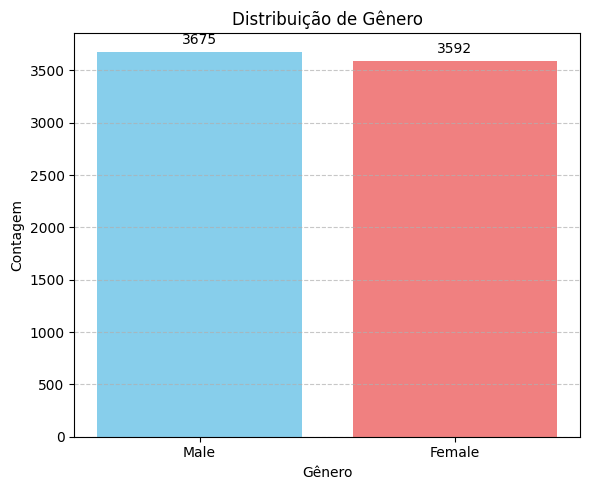

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

contagem_genero = df_concatenada['gender'].value_counts()

# 'contagem_genero' agora é uma Series:
# gender
# Male      3675
# Female    3592
# Name: count, dtype: int64

# Criar o gráfico de barras usando o índice (os gêneros) e os valores (as contagens) da Series
plt.figure(figsize=(6, 5)) # Opcional: Ajusta o tamanho da figura para melhor legibilidade

# contagem_genero.index são os nomes dos gêneros (Male, Female)
# contagem_genero.values são as contagens (3675, 3592)
plt.bar(contagem_genero.index, contagem_genero.values, color=['skyblue', 'lightcoral']) # Você pode escolher suas cores

# Adicionar rótulos e título
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Distribuição de Gênero')

# Adicionar os valores de contagem no topo das barras
for i, count in enumerate(contagem_genero.values):
    plt.text(i, count + 50, str(count), ha='center', va='bottom') # Ajuste +50 para a posição do texto

# Mostrar o gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7) # Opcional: Adiciona uma grade para melhor legibilidade
plt.tight_layout() # Ajusta o layout para evitar que os rótulos se sobreponham
plt.show()

In [26]:
# Verifica valores únicos e contagem do método de pagamento
df_concatenada['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64

#📊 Carga e análise

Nesta etapa:

- Salvar o dataframe concatenado que foi gerado.

In [27]:
df_concatenada.to_csv('telecomX_concatenado.csv', index=False)

In [28]:
df_telecomX = pd.read_csv('telecomX_concatenado.csv')
df_telecomX = df_telecomX.set_index('customerID')
df_telecomX

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0.0,Female,False,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
0003-MKNFE,0.0,Male,False,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
0004-TLHLJ,1.0,Male,False,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
0011-IGKFF,1.0,Male,True,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
0013-EXCHZ,1.0,Female,True,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,0.0,Female,False,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
9992-RRAMN,1.0,Male,False,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
9992-UJOEL,0.0,Male,False,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75


In [29]:
print(df_telecomX.columns)

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')


In [30]:
# Faz a contagem de Churn, onde 'Yes'= 1 e 'No' = 0
df_telecomX['Churn'].value_counts()

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

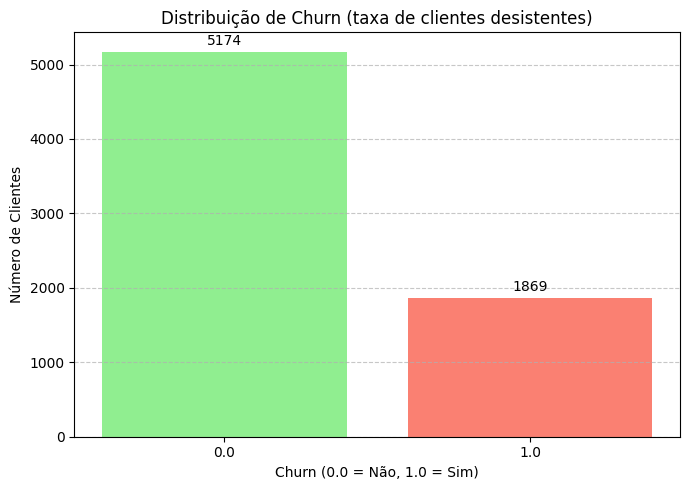

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Calcular as contagens de Churn
contagem_churn = df_telecomX['Churn'].value_counts()

# 2. Criar o gráfico de barras
plt.figure(figsize=(7, 5)) # Ajusta o tamanho da figura para o gráfico de Churn

# Usar o índice (0.0, 1.0) para o eixo X e os valores (contagens) para o eixo Y
barras = plt.bar(contagem_churn.index.astype(str), contagem_churn.values, color=['lightgreen', 'salmon'])
# Convertemos o índice para string (ex: '0.0', '1.0') para melhor visualização no eixo X.
# Cores escolhidas para diferenciar "Não" e "Sim"

# 3. Adicionar rótulos e título
plt.xlabel('Churn (0.0 = Não, 1.0 = Sim)')
plt.ylabel('Número de Clientes')
plt.title('Distribuição de Churn (taxa de clientes desistentes)')
plt.xticks(rotation=0) # Garante que os rótulos do eixo X não girem

# 4. Adicionar os valores de contagem no topo das barras
for bar in barras:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval), ha='center', va='bottom') # Ajuste +50 para posição do texto

# 5. Melhorar a visualização
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona uma grade horizontal
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

In [32]:
# Faz a contagem de Churn por sexo, onde 'Yes'= 1 e 'No' = 0
churn_genero = df_telecomX.groupby('gender')['Churn'].value_counts()
churn_genero

gender  Churn
Female  0.0      2549
        1.0       939
Male    0.0      2625
        1.0       930
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

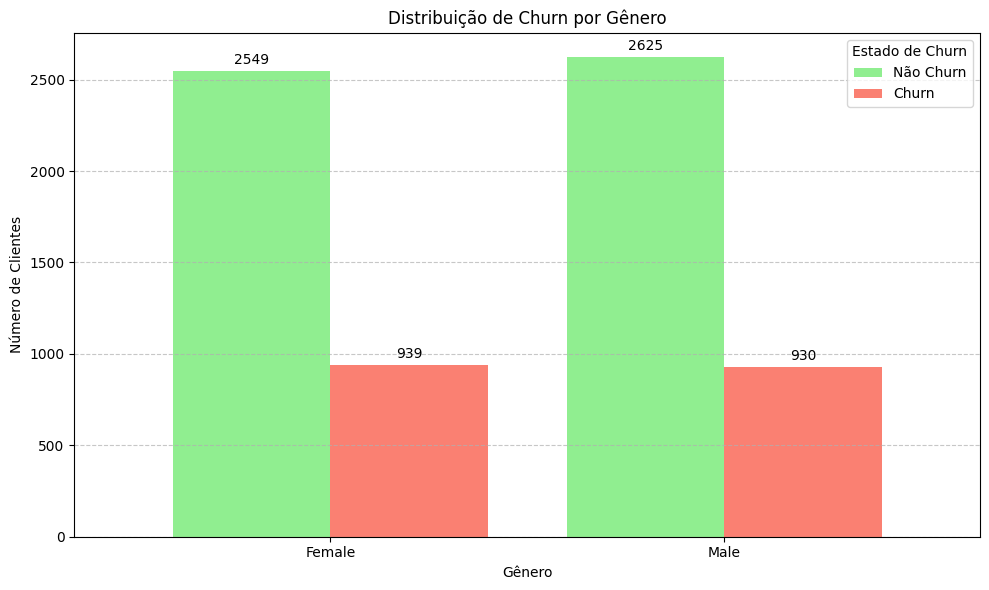

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Obter a contagem de Churn por gênero (como no seu código da imagem)
churn_genero = df_telecomX.groupby('gender')['Churn'].value_counts()

# 2. Desempilhar (unstack) a Series para ter 'gender' como índice e 'Churn' como colunas
# Isso é útil para plotar barras agrupadas ou empilhadas
df_plot = churn_genero.unstack(level='Churn')

# Opcional: Renomear as colunas para algo mais legível no gráfico
df_plot.columns = ['Não Churn', 'Churn'] # Assumindo 0.0=Não Churn, 1.0=Churn

# 3. Criar o gráfico de barras agrupado
plt.figure(figsize=(10, 6))

# df_plot.plot(kind='bar') plota automaticamente as colunas como barras agrupadas
ax = df_plot.plot(kind='bar', figsize=(10, 6), color=['lightgreen', 'salmon'], width=0.8)

# 4. Adicionar rótulos, título e legenda
plt.title('Distribuição de Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0) # Garante que os rótulos do eixo X fiquem retos
plt.legend(title='Estado de Churn', labels=['Não Churn', 'Churn']) # Ajusta a legenda

# 5. Adicionar os valores de contagem no topo das barras
for container in ax.containers: # Itera sobre os conjuntos de barras (um para Não Churn, outro para Churn)
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# 6. Melhorar a visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

In [34]:
# Faz a contagem de Churn por senioridade, onde 'True'= 1 e 'False' = 0
churn_idoso = df_telecomX.groupby('SeniorCitizen')['Churn'].value_counts()
churn_idoso

SeniorCitizen  Churn
False          0.0      4508
               1.0      1393
True           0.0       666
               1.0       476
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

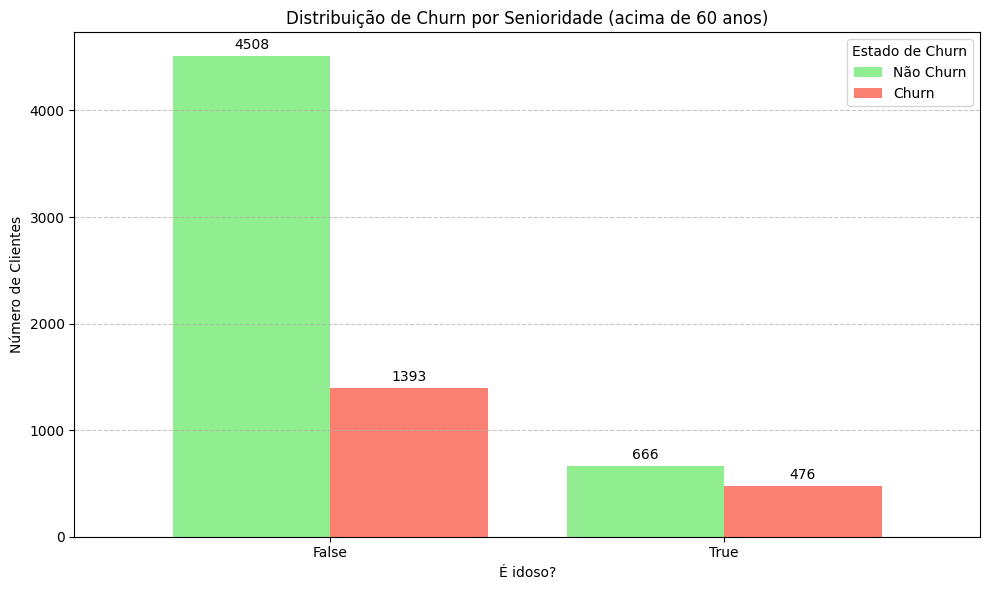

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Obter a contagem de Churn por gênero (como no seu código da imagem)
churn_idoso = df_telecomX.groupby('SeniorCitizen')['Churn'].value_counts()

# 2. Desempilhar (unstack) a Series para ter 'gender' como índice e 'Churn' como colunas
# Isso é útil para plotar barras agrupadas ou empilhadas
df_plot = churn_idoso.unstack(level='Churn')

# Opcional: Renomear as colunas para algo mais legível no gráfico
df_plot.columns = ['Não Churn', 'Churn'] # Assumindo 0.0=Não Churn, 1.0=Churn

# 3. Criar o gráfico de barras agrupado
plt.figure(figsize=(10, 6))

# df_plot.plot(kind='bar') plota automaticamente as colunas como barras agrupadas
ax = df_plot.plot(kind='bar', figsize=(10, 6), color=['lightgreen', 'salmon'], width=0.8)

# 4. Adicionar rótulos, título e legenda
plt.title('Distribuição de Churn por Senioridade (acima de 60 anos)')
plt.xlabel('É idoso?')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0) # Garante que os rótulos do eixo X fiquem retos
plt.legend(title='Estado de Churn', labels=['Não Churn', 'Churn']) # Ajusta a legenda

# 5. Adicionar os valores de contagem no topo das barras
for container in ax.containers: # Itera sobre os conjuntos de barras (um para Não Churn, outro para Churn)
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# 6. Melhorar a visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

In [36]:
# Faz a contagem de Churn por estado civil (parceiro), onde 'Yes'= 1 e 'No' = 0
churn_parceiro = df_telecomX.groupby('Partner')['Churn'].value_counts()
churn_parceiro

Partner  Churn
No       0.0      2441
         1.0      1200
Yes      0.0      2733
         1.0       669
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

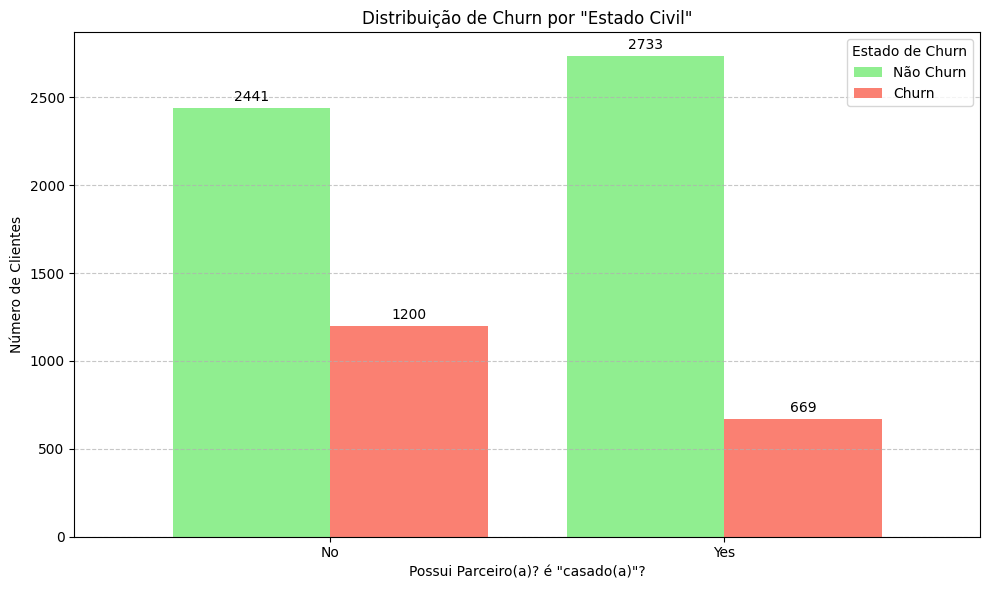

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Obter a contagem de Churn por gênero (como no seu código da imagem)
churn_parceiro = df_telecomX.groupby('Partner')['Churn'].value_counts()

# 2. Desempilhar (unstack) a Series para ter 'gender' como índice e 'Churn' como colunas
# Isso é útil para plotar barras agrupadas ou empilhadas
df_plot = churn_parceiro.unstack(level='Churn')

# Opcional: Renomear as colunas para algo mais legível no gráfico
df_plot.columns = ['Não Churn', 'Churn'] # Assumindo 0.0=Não Churn, 1.0=Churn

# 3. Criar o gráfico de barras agrupado
plt.figure(figsize=(10, 6))

# df_plot.plot(kind='bar') plota automaticamente as colunas como barras agrupadas
ax = df_plot.plot(kind='bar', figsize=(10, 6), color=['lightgreen', 'salmon'], width=0.8)

# 4. Adicionar rótulos, título e legenda
plt.title('Distribuição de Churn por "Estado Civil"')
plt.xlabel('Possui Parceiro(a)? é "casado(a)"?')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0) # Garante que os rótulos do eixo X fiquem retos
plt.legend(title='Estado de Churn', labels=['Não Churn', 'Churn']) # Ajusta a legenda

# 5. Adicionar os valores de contagem no topo das barras
for container in ax.containers: # Itera sobre os conjuntos de barras (um para Não Churn, outro para Churn)
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# 6. Melhorar a visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

In [38]:
# Faz a contagem de Churn se possui ou não dependentes, onde 'Yes'= 1 e 'No' = 0
churn_dependentes = df_telecomX.groupby('Dependents')['Churn'].value_counts()
churn_dependentes

Dependents  Churn
No          0.0      3390
            1.0      1543
Yes         0.0      1784
            1.0       326
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

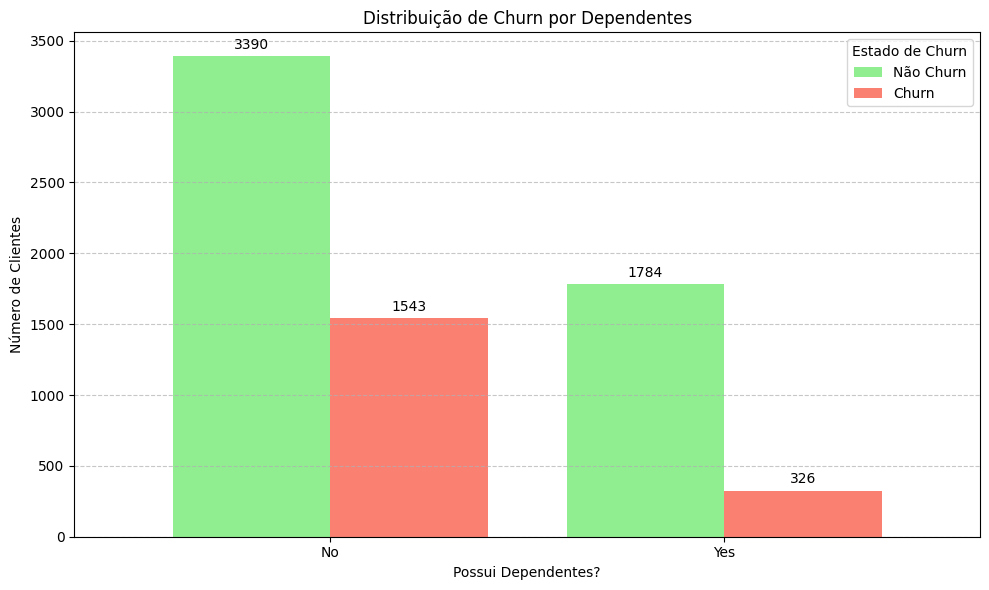

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Obter a contagem de Churn por gênero (como no seu código da imagem)
churn_dependentes = df_telecomX.groupby('Dependents')['Churn'].value_counts()

# 2. Desempilhar (unstack) a Series para ter 'gender' como índice e 'Churn' como colunas
# Isso é útil para plotar barras agrupadas ou empilhadas
df_plot = churn_dependentes.unstack(level='Churn')

# Opcional: Renomear as colunas para algo mais legível no gráfico
df_plot.columns = ['Não Churn', 'Churn'] # Assumindo 0.0=Não Churn, 1.0=Churn

# 3. Criar o gráfico de barras agrupado
plt.figure(figsize=(10, 6))

# df_plot.plot(kind='bar') plota automaticamente as colunas como barras agrupadas
ax = df_plot.plot(kind='bar', figsize=(10, 6), color=['lightgreen', 'salmon'], width=0.8)

# 4. Adicionar rótulos, título e legenda
plt.title('Distribuição de Churn por Dependentes')
plt.xlabel('Possui Dependentes?')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0) # Garante que os rótulos do eixo X fiquem retos
plt.legend(title='Estado de Churn', labels=['Não Churn', 'Churn']) # Ajusta a legenda

# 5. Adicionar os valores de contagem no topo das barras
for container in ax.containers: # Itera sobre os conjuntos de barras (um para Não Churn, outro para Churn)
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# 6. Melhorar a visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

In [40]:
# Faz a contagem de Churn pela quantidade de meses de contrato
churn_meses_contrato = df_telecomX.groupby('tenure')['Churn'].value_counts()
churn_meses_contrato

tenure  Churn
0       0.0       11
1       1.0      380
        0.0      233
2       1.0      123
        0.0      115
                ... 
70      1.0       11
71      0.0      164
        1.0        6
72      0.0      356
        1.0        6
Name: count, Length: 145, dtype: int64

In [80]:
print(df_telecomX.columns)

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'tenure_faixa'],
      dtype='object')


In [81]:
# criando uma uma versão mais visual do dataframe anterior (contagem de Churn pela quantidade de meses de contrato)

import pandas as pd
import numpy as np

# --- CRIAÇÃO DA COLUNA DE FAIXAS DE MESES (TENURE_FAIXA) ---
# Definir as faixas (bins) para os meses de contrato (tenure)
# Faixas de 6 em 6 meses, com um ajuste para incluir '0' na primeira faixa.
bins = [-1, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72]
labels = [
    '0-6 meses', '7-12 meses', '13-18 meses', '19-24 meses', '25-30 meses',
    '31-36 meses', '37-42 meses', '43-48 meses', '49-54 meses', '55-60 meses',
    '61-66 meses', '67-72 meses'
]

# Criar a nova coluna 'tenure_faixa' no DataFrame
df_telecomX['tenure_faixa'] = pd.cut(df_telecomX['tenure'], bins=bins, labels=labels, right=True)
df_telecomX['tenure_faixa']

customerID
0002-ORFBO     7-12 meses
0003-MKNFE     7-12 meses
0004-TLHLJ      0-6 meses
0011-IGKFF    13-18 meses
0013-EXCHZ      0-6 meses
                 ...     
9987-LUTYD    13-18 meses
9992-RRAMN    19-24 meses
9992-UJOEL      0-6 meses
9993-LHIEB    67-72 meses
9995-HOTOH    61-66 meses
Name: tenure_faixa, Length: 7267, dtype: category
Categories (12, object): ['0-6 meses' < '7-12 meses' < '13-18 meses' < '19-24 meses' ... '49-54 meses' < '55-60 meses' < '61-66 meses' < '67-72 meses']

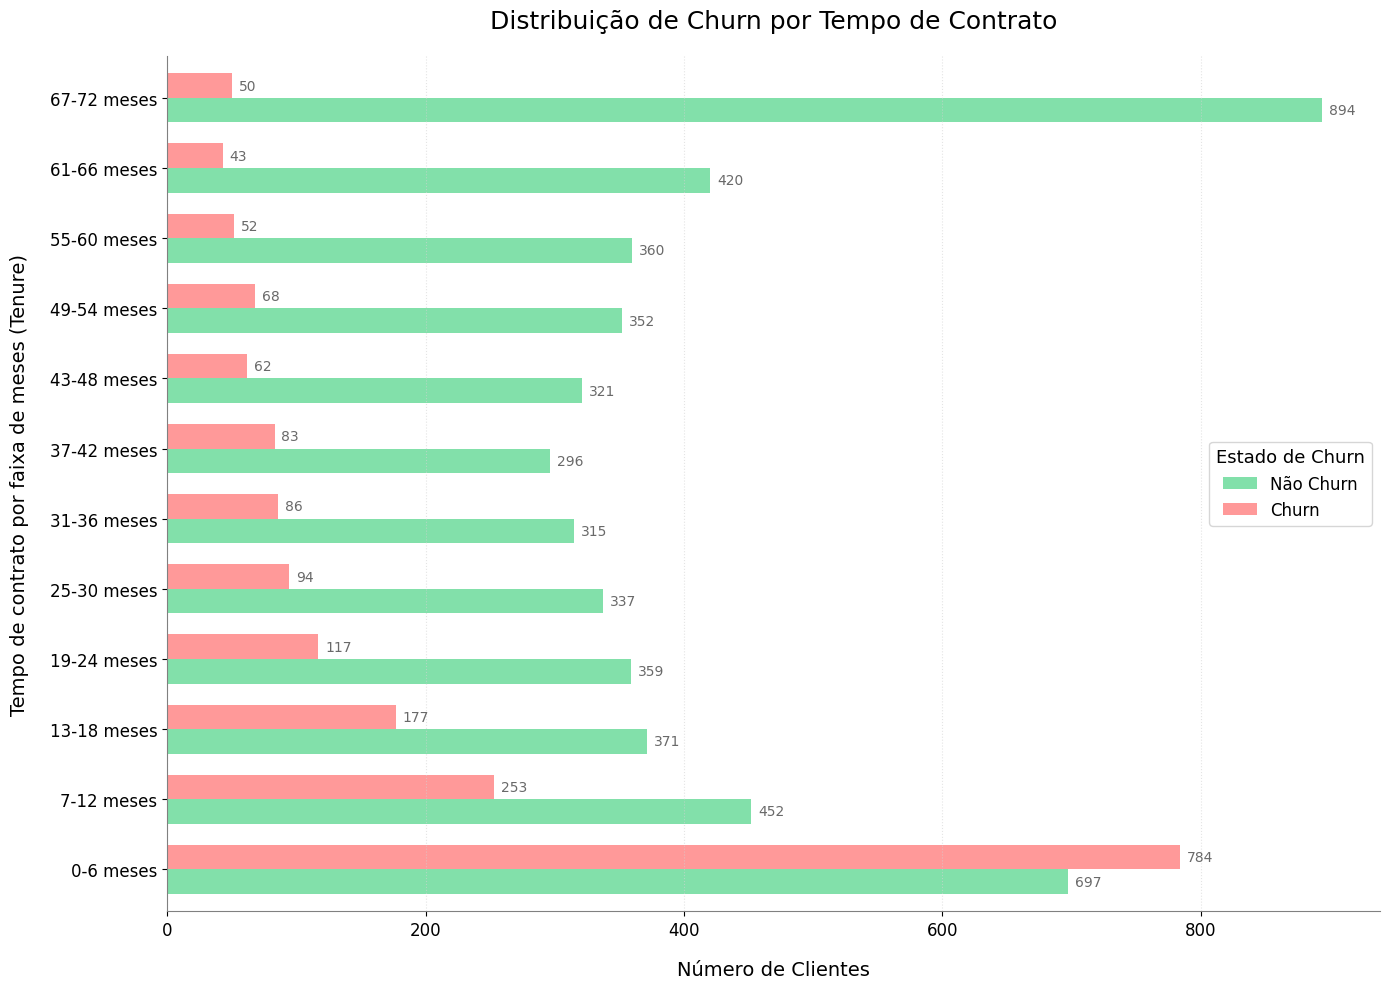

In [83]:
import matplotlib.pyplot as plt

# Obter a contagem de Churn por 'tenure_faixa'
churn_faixas = df_telecomX.groupby('tenure_faixa', observed=False)['Churn'].value_counts()

# Desempilhar (unstack) a Series para ter 'tenure_faixa' como índice e 'Churn' como colunas
df_plot_faixas = churn_faixas.unstack(level='Churn')

# Renomear as colunas para algo mais legível no gráfico
df_plot_faixas.columns = ['Não Churn', 'Churn']

# --- GERAÇÃO DO GRÁFICO ---
plt.figure(figsize=(14, 10)) # Define o tamanho geral da figura

# Plota as barras horizontais, usando as cores e largura definidas
ax = df_plot_faixas.plot(kind='barh', figsize=(14, 10), color=['#82e0aa', '#ff9999'], width=0.7, ax=plt.gca())

# Adicionar rótulos, título e legenda
plt.title('Distribuição de Churn por Tempo de Contrato', fontsize=18, pad=20)
plt.xlabel('Número de Clientes', fontsize=14, labelpad=15)
plt.ylabel('Tempo de contrato por faixa de meses (Tenure)', fontsize=14, labelpad=15)

# Ajusta o tamanho da fonte dos ticks nos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Configura a legenda (título, rótulos, tamanho da fonte e posição)
plt.legend(title='Estado de Churn', labels=['Não Churn', 'Churn'],
           fontsize=12, title_fontsize=13, loc='center right')

# Adicionar os valores de contagem no topo das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5, fontsize=10, color='dimgray')

# Melhorar a visualização: Remover spines (bordas) e refinar grade
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

# Adiciona uma grade no eixo X, com estilo pontilhado e cor clara para ser discreta
plt.grid(axis='x', linestyle=':', alpha=0.6, color='lightgray')

plt.tight_layout() # Ajusta o layout para evitar sobreposição de elementos
plt.show()

In [44]:
# Faz a contagem de Churn pelo tipo de contrato (mensal, anual, bianual)
churn_tipo_contrato = df_telecomX.groupby('Contract')['Churn'].value_counts()
churn_tipo_contrato

Contract        Churn
Month-to-month  0.0      2220
                1.0      1655
One year        0.0      1307
                1.0       166
Two year        0.0      1647
                1.0        48
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

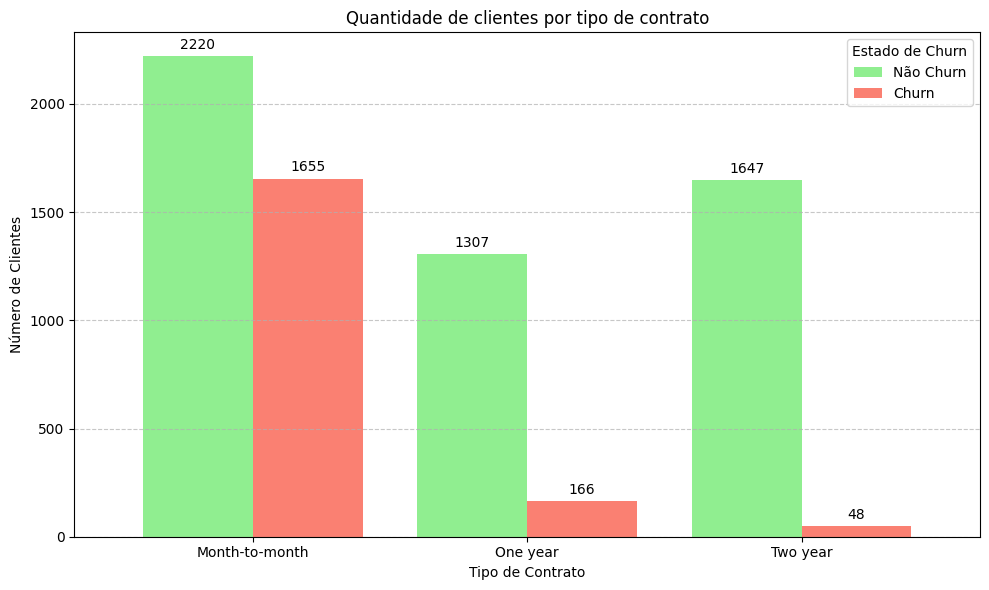

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Obter a contagem de Churn por gênero (como no seu código da imagem)
churn_tipo_contrato = df_telecomX.groupby('Contract')['Churn'].value_counts()

# 2. Desempilhar (unstack) a Series para ter 'gender' como índice e 'Churn' como colunas
# Isso é útil para plotar barras agrupadas ou empilhadas
df_plot = churn_tipo_contrato.unstack(level='Churn')

# Opcional: Renomear as colunas para algo mais legível no gráfico
df_plot.columns = ['Não Churn', 'Churn'] # Assumindo 0.0=Não Churn, 1.0=Churn

# 3. Criar o gráfico de barras agrupado
plt.figure(figsize=(10, 6))

# df_plot.plot(kind='bar') plota automaticamente as colunas como barras agrupadas
ax = df_plot.plot(kind='bar', figsize=(10, 6), color=['lightgreen', 'salmon'], width=0.8)

# 4. Adicionar rótulos, título e legenda
plt.title('Quantidade de clientes por tipo de contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0) # Garante que os rótulos do eixo X fiquem retos
plt.legend(title='Estado de Churn', labels=['Não Churn', 'Churn']) # Ajusta a legenda

# 5. Adicionar os valores de contagem no topo das barras
for container in ax.containers: # Itera sobre os conjuntos de barras (um para Não Churn, outro para Churn)
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# 6. Melhorar a visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

In [45]:
# Faz a contagem de Churn pela forma de pagamento (cheque eletrônico, cartão de crédito, cheque enviado pelo correio e transferência bancária)
churn_forma_pagamento = df_telecomX.groupby('PaymentMethod')['Churn'].value_counts()
churn_forma_pagamento

PaymentMethod              Churn
Bank transfer (automatic)  0.0      1286
                           1.0       258
Credit card (automatic)    0.0      1290
                           1.0       232
Electronic check           0.0      1294
                           1.0      1071
Mailed check               0.0      1304
                           1.0       308
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

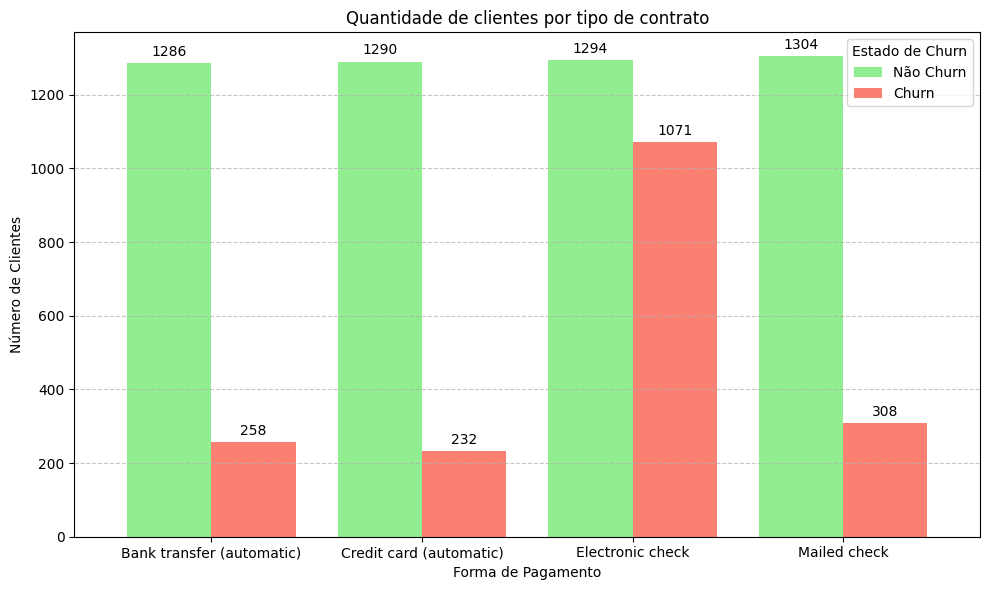

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Obter a contagem de Churn por gênero (como no seu código da imagem)
churn_forma_pagamento = df_telecomX.groupby('PaymentMethod')['Churn'].value_counts()

# 2. Desempilhar (unstack) a Series para ter 'gender' como índice e 'Churn' como colunas
# Isso é útil para plotar barras agrupadas ou empilhadas
df_plot = churn_forma_pagamento.unstack(level='Churn')

# Opcional: Renomear as colunas para algo mais legível no gráfico
df_plot.columns = ['Não Churn', 'Churn'] # Assumindo 0.0=Não Churn, 1.0=Churn

# 3. Criar o gráfico de barras agrupado
plt.figure(figsize=(10, 6))

# df_plot.plot(kind='bar') plota automaticamente as colunas como barras agrupadas
ax = df_plot.plot(kind='bar', figsize=(10, 6), color=['lightgreen', 'salmon'], width=0.8)

# 4. Adicionar rótulos, título e legenda
plt.title('Quantidade de clientes por tipo de contrato')
plt.xlabel('Forma de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0) # Garante que os rótulos do eixo X fiquem retos
plt.legend(title='Estado de Churn', labels=['Não Churn', 'Churn']) # Ajusta a legenda

# 5. Adicionar os valores de contagem no topo das barras
for container in ax.containers: # Itera sobre os conjuntos de barras (um para Não Churn, outro para Churn)
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# 6. Melhorar a visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

In [ ]:
# Calculo do total do total de todos os serviços dos clientes por mês x 'Churn'
churn_gasto_mensal = df_telecomX.groupby('Charges.Monthly')['Churn'].sum()
churn_gasto_mensal

Charges.Monthly
18.25     0.0
18.40     0.0
18.55     0.0
18.70     0.0
18.75     0.0
         ... 
118.20    0.0
118.35    1.0
118.60    0.0
118.65    0.0
118.75    0.0
Name: Churn, Length: 1585, dtype: float64

In [90]:
# CRIAÇÃO DAS FAIXAS DE GASTO MENSAL ('Charges.Monthly')

# 1. Encontrar o valor mínimo e máximo de Charges.Monthly
min_charge = df_telecomX['Charges.Monthly'].min()
max_charge = df_telecomX['Charges.Monthly'].max()

# 2. Definir os limites das faixas de R$ 10,00 em R$ 10,00
# Arredondamos o min_charge para baixo e o max_charge para cima
# para garantir que todas as cargas sejam incluídas.
min_bin = np.floor(min_charge / 10) * 10
max_bin = np.ceil(max_charge / 10) * 10 + 10 # Adiciona 10 para garantir que o último valor seja incluído

bins_charges = np.arange(min_bin, max_bin, 10)

# 3. Criar os rótulos para as faixas
labels_charges = [f'R$ {int(i)}-{int(i+9.99)}' for i in bins_charges[:-1]]

# 4. Criar a nova coluna 'charges_faixa' no DataFrame
df_telecomX['charges_faixa'] = pd.cut(
    df_telecomX['Charges.Monthly'],
    bins=bins_charges,
    labels=labels_charges,
    right=False, # Definir como False para incluir o limite inferior e excluir o superior (ex: [10-20))
    include_lowest=True # Incluir o menor valor na primeira faixa
)

# --- ANÁLISE E TABELA DAS FAIXAS DE GASTO ---

# Obter a contagem de Churn por 'charges_faixa'
churn_charges_faixas = df_telecomX.groupby('charges_faixa', observed=False)['Churn'].value_counts()

# Desempilhar (unstack) a Series para ter 'charges_faixa' como índice e 'Churn' como colunas
df_plot_charges_faixas = churn_charges_faixas.unstack(level='Churn')

# Renomear as colunas
df_plot_charges_faixas.columns = ['Não Churn', 'Churn']

# Preencher NaN's com 0 (importante para cálculos de soma)
df_plot_charges_faixas = df_plot_charges_faixas.fillna(0)

# Adicionar colunas de soma e porcentagem
df_plot_charges_faixas['Total Clientes'] = df_plot_charges_faixas['Não Churn'] + df_plot_charges_faixas['Churn']
df_plot_charges_faixas['% Churn'] = (df_plot_charges_faixas['Churn'] / df_plot_charges_faixas['Total Clientes']) * 100
df_plot_charges_faixas['% Churn'] = df_plot_charges_faixas['% Churn'].round(2)

# --- EXIBIÇÃO DA TABELA ---
print("DataFrame com contagem de clientes, churn e % de churn por faixa de gasto mensal:")
df_charges_display = df_plot_charges_faixas[['Total Clientes', 'Não Churn', 'Churn', '% Churn']]
#print(df_charges_display.to_markdown(numalign="left", stralign="left"))
df_charges_display

DataFrame com contagem de clientes, churn e % de churn por faixa de gasto mensal:


,Total Clientes,Não Churn,Churn,% Churn
charges_faixa,,,,
R$ 10-19,613,558,55,8.97
R$ 20-29,1040,933,107,10.29
R$ 30-39,184,133,51,27.72
R$ 40-49,457,309,148,32.39
R$ 50-59,613,485,128,20.88
R$ 60-69,545,439,106,19.45
R$ 70-79,914,550,364,39.82
R$ 80-89,933,596,337,36.12
R$ 90-99,836,520,316,37.80


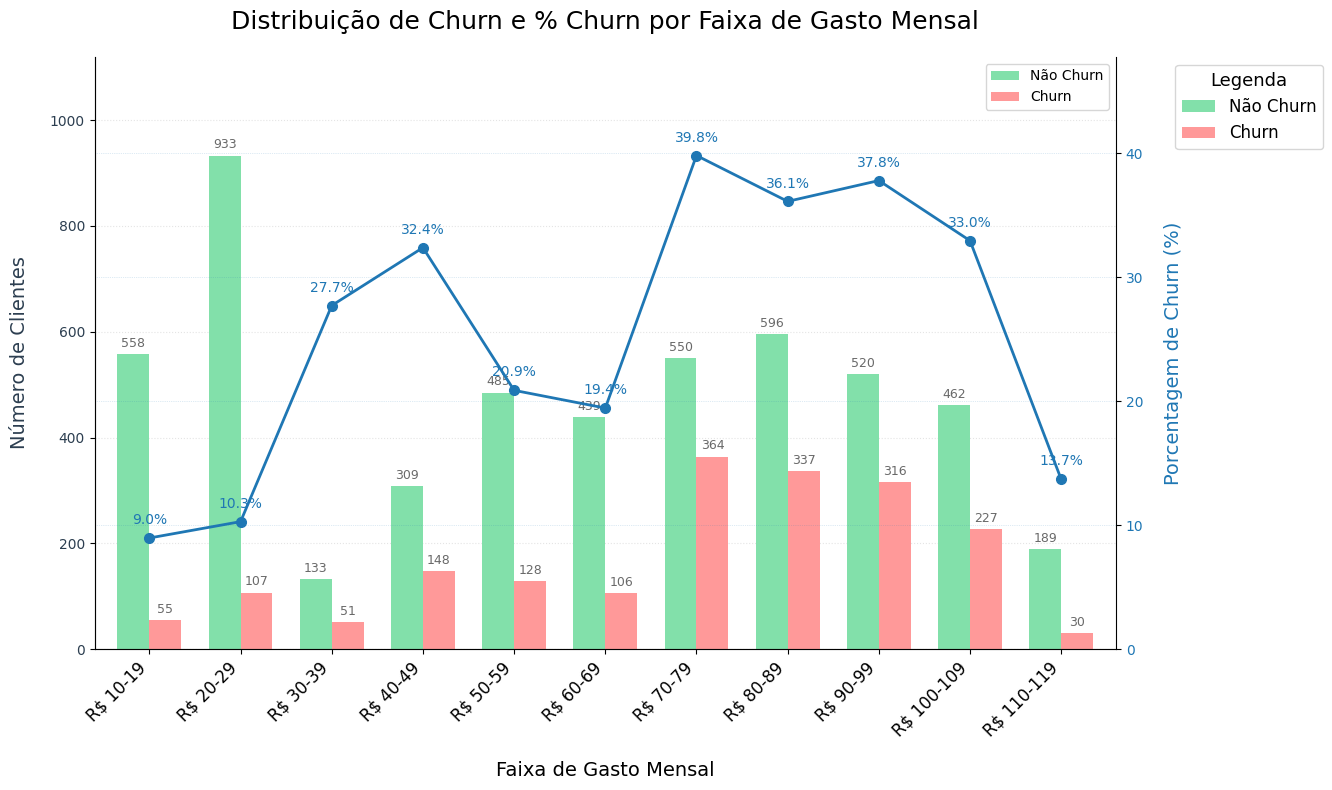

In [94]:
# --- GERAÇÃO DO GRÁFICO COMBINADO (BARRAS E LINHA COM EIXO SECUNDÁRIO) ---

fig, ax1 = plt.subplots(figsize=(15, 8)) # Aumenta um pouco a largura da figura

# GRÁFICO DE BARRAS (Eixo Y Primário - Contagem de Clientes)
# Substituído df_charges por df_charges_display
df_charges_display[['Não Churn', 'Churn']].plot(kind='bar', ax=ax1,
                                         color=['#82e0aa', '#ff9999'],
                                         width=0.7, zorder=2)

ax1.set_title('Distribuição de Churn e % Churn por Faixa de Gasto Mensal', fontsize=18, pad=20)
ax1.set_xlabel('Faixa de Gasto Mensal', fontsize=14, labelpad=15)
ax1.set_ylabel('Número de Clientes', fontsize=14, labelpad=15, color='#2c3e50')
ax1.tick_params(axis='y', labelcolor='#2c3e50')
ax1.set_xticklabels(df_charges_display.index, rotation=45, ha='right', fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.set_ylim(0, df_charges_display[['Não Churn', 'Churn']].max().max() * 1.2)

# Adicionar os valores de contagem no topo das barras
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9, color='dimgray')

# GRÁFICO DE LINHA (Eixo Y Secundário - Porcentagem de Churn)
ax2 = ax1.twinx()

# Substituído df_charges por df_charges_display
ax2.plot(df_charges_display.index, df_charges_display['% Churn'], color='#1f77b4', marker='o', linestyle='-', linewidth=2, markersize=7, zorder=3)

ax2.set_ylabel('Porcentagem de Churn (%)', fontsize=14, labelpad=15, color='#1f77b4')
ax2.tick_params(axis='y', labelcolor='#1f77b4')
ax2.set_ylim(0, df_charges_display['% Churn'].max() * 1.2) # Ajusta o limite Y para a porcentagem

# Adicionar os valores da porcentagem acima dos pontos da linha
for i, txt in enumerate(df_charges_display['% Churn']):
    ax2.annotate(f'{txt:.1f}%', (df_charges_display.index[i], df_charges_display['% Churn'].iloc[i]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='#1f77b4')


# COMBINAR AS LEGENDAS
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + ['% Churn'], title='Legenda', fontsize=12, title_fontsize=13, loc='upper left', bbox_to_anchor=(1.05, 1))

# MELHORIAS VISUAIS
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_color('gray')
ax1.spines['left'].set_color('gray')

ax2.spines['top'].set_visible(False)

ax1.grid(axis='y', linestyle=':', alpha=0.6, color='lightgray')
ax2.grid(axis='y', linestyle=':', alpha=0.3, color='#1f77b4', linewidth=0.5)

fig.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

In [96]:
# Calculo do total de gasto acumulado por cliente
churn_gasto_total = df_telecomX.groupby('Charges.Total')['Churn'].sum()
churn_gasto_total

Charges.Total
18.80      0.0
18.85      1.0
18.90      0.0
19.00      0.0
19.05      0.0
          ... 
8564.75    0.0
8594.40    0.0
8670.10    0.0
8672.45    0.0
8684.80    1.0
Name: Churn, Length: 6531, dtype: float64

In [103]:
# --- CRIAÇÃO DAS FAIXAS DE GASTO TOTAL ('Charges.Total') ---

# 1. Encontrar o valor mínimo e máximo de Charges.Total
min_charge_total = df_telecomX['Charges.Total'].min()
max_charge_total = df_telecomX['Charges.Total'].max()

# 2. Definir o intervalo das faixas para que o número de faixas não exceda 10
# Calculamos o tamanho aproximado da faixa e arredondamos para um valor "bonito" (múltiplo de 100)
intervalo_desejado = (max_charge_total - min_charge_total) / 9 # Dividimos por 9 para garantir no máximo 10 faixas
step_size = np.ceil(intervalo_desejado / 100) * 100 # Arredonda para o próximo múltiplo de 100
# Se o step_size for muito pequeno (ex: < 100), podemos forçar um mínimo
if step_size < 100:
    step_size = 100
step_size = int(step_size) # Garante que seja um inteiro

min_bin_total = np.floor(min_charge_total / step_size) * step_size
max_bin_total = np.ceil(max_charge_total / step_size) * step_size + step_size

bins_charges_total = np.arange(min_bin_total, max_bin_total, step_size)

# 3. Criar os rótulos para as faixas
labels_charges_total = [f'R$ {int(i)}-{int(i+step_size-0.01)}' for i in bins_charges_total[:-1]] # Ajustado para o step_size

# 4. Criar a nova coluna 'charges_total_faixa' no DataFrame
df_telecomX['charges_total_faixa'] = pd.cut(
    df_telecomX['Charges.Total'],
    bins=bins_charges_total,
    labels=labels_charges_total,
    right=False, # Incluir o limite inferior e excluir o superior
    include_lowest=True # Incluir o menor valor na primeira faixa
)

# --- ANÁLISE E TABELA DAS FAIXAS DE GASTO TOTAL ---

# Obter a contagem de Churn por 'charges_total_faixa'
churn_charges_total_faixas = df_telecomX.groupby('charges_total_faixa', observed=False)['Churn'].value_counts()

# Desempilhar (unstack) a Series
df_plot_charges_total_faixas = churn_charges_total_faixas.unstack(level='Churn')

# Renomear as colunas
df_plot_charges_total_faixas.columns = ['Não Churn', 'Churn']

# Preencher NaN's com 0
df_plot_charges_total_faixas = df_plot_charges_total_faixas.fillna(0)

# Adicionar colunas de soma e porcentagem
df_plot_charges_total_faixas['Total Clientes'] = df_plot_charges_total_faixas['Não Churn'] + df_plot_charges_total_faixas['Churn']

# Garanta que não divida por zero ao calcular a % Churn
df_plot_charges_total_faixas['% Churn'] = np.where(
    df_plot_charges_total_faixas['Total Clientes'] > 0,
    (df_plot_charges_total_faixas['Churn'] / df_plot_charges_total_faixas['Total Clientes']) * 100,
    0
)
df_plot_charges_total_faixas['% Churn'] = df_plot_charges_total_faixas['% Churn'].round(2)

# --- EXIBIÇÃO DA TABELA ---
print(f"DataFrame com contagem de clientes, churn e % de churn por faixa de **gasto total** (faixas de R$ {step_size},00):")
df_charges_total_display = df_plot_charges_total_faixas[['Total Clientes', 'Não Churn', 'Churn', '% Churn']]
df_charges_total_display


DataFrame com contagem de clientes, churn e % de churn por faixa de **gasto total** (faixas de R$ 1000,00):


,Total Clientes,Não Churn,Churn,% Churn
charges_total_faixa,,,,
R$ 0-999,2893,1823,1070,36.99
R$ 1000-1999,1283,1014,269,20.97
R$ 2000-2999,663,483,180,27.15
R$ 3000-3999,556,449,107,19.24
R$ 4000-4999,513,427,86,16.76
R$ 5000-5999,443,374,69,15.58
R$ 6000-6999,365,310,55,15.07
R$ 7000-7999,249,219,30,12.05
R$ 8000-8999,78,75,3,3.85


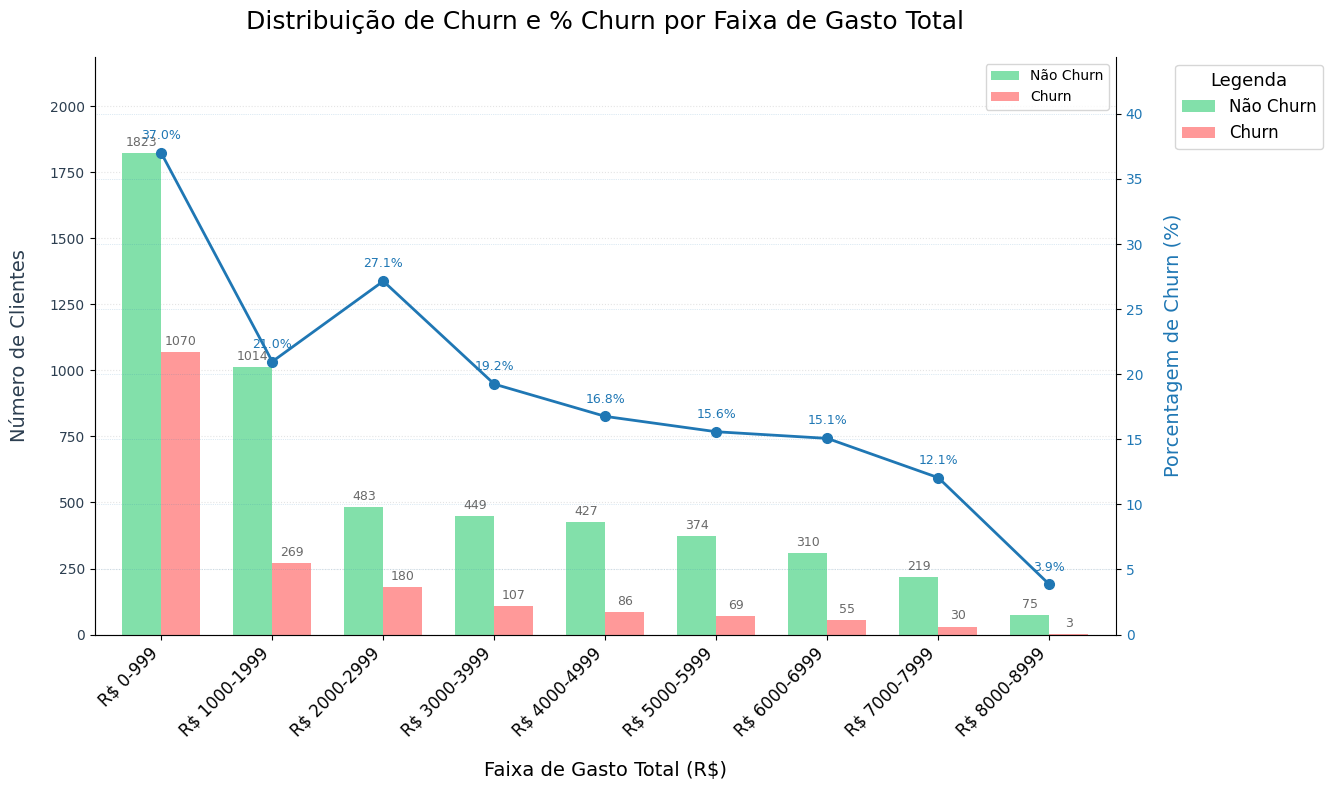

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

# --- CRIAÇÃO DAS FAIXAS DE GASTO TOTAL ('Charges.Total') ---

min_charge_total = df_telecomX['Charges.Total'].min()
max_charge_total = df_telecomX['Charges.Total'].max()

# Calcular o intervalo para que o número de faixas não exceda 10
intervalo_desejado = (max_charge_total - min_charge_total) / 9 # Dividimos por 9 para garantir no máximo 10 faixas
step_size = np.ceil(intervalo_desejado / 100) * 100 # Arredonda para o próximo múltiplo de 100
if step_size < 100: # Garante um mínimo razoável para a faixa
    step_size = 100
step_size = int(step_size)

min_bin_total = np.floor(min_charge_total / step_size) * step_size
max_bin_total = np.ceil(max_charge_total / step_size) * step_size + step_size

bins_charges_total = np.arange(min_bin_total, max_bin_total, step_size)

labels_charges_total = [f'R$ {int(i)}-{int(i+step_size-0.01)}' for i in bins_charges_total[:-1]]

df_telecomX['charges_total_faixa'] = pd.cut(
    df_telecomX['Charges.Total'],
    bins=bins_charges_total,
    labels=labels_charges_total,
    right=False,
    include_lowest=True
)

# --- PREPARAÇÃO DOS DADOS PARA O GRÁFICO (CHURN POR FAIXAS DE GASTO TOTAL) ---
churn_charges_total_faixas = df_telecomX.groupby('charges_total_faixa', observed=False)['Churn'].value_counts()
df_plot_charges_total_faixas = churn_charges_total_faixas.unstack(level='Churn')
df_plot_charges_total_faixas.columns = ['Não Churn', 'Churn']
df_plot_charges_total_faixas = df_plot_charges_total_faixas.fillna(0)

df_plot_charges_total_faixas['Total Clientes'] = df_plot_charges_total_faixas['Não Churn'] + df_plot_charges_total_faixas['Churn']
df_plot_charges_total_faixas['% Churn'] = np.where(
    df_plot_charges_total_faixas['Total Clientes'] > 0,
    (df_plot_charges_total_faixas['Churn'] / df_plot_charges_total_faixas['Total Clientes']) * 100,
    0
)
df_plot_charges_total_faixas['% Churn'] = df_plot_charges_total_faixas['% Churn'].round(2)


# --- GERAÇÃO DO GRÁFICO COMBINADO (BARRAS E LINHA COM EIXO SECUNDÁRIO) ---

fig, ax1 = plt.subplots(figsize=(15, 8)) # Aumenta um pouco a largura da figura

# GRÁFICO DE BARRAS (Eixo Y Primário - Contagem de Clientes)
# Usamos df_plot_charges_total_faixas que tem os dados de gasto total
df_plot_charges_total_faixas[['Não Churn', 'Churn']].plot(kind='bar', ax=ax1,
                                         color=['#82e0aa', '#ff9999'],
                                         width=0.7, zorder=2)

# Títulos e rótulos adaptados para Gasto Total
ax1.set_title('Distribuição de Churn e % Churn por Faixa de Gasto Total', fontsize=18, pad=20)
ax1.set_xlabel('Faixa de Gasto Total (R$)', fontsize=14, labelpad=15)
ax1.set_ylabel('Número de Clientes', fontsize=14, labelpad=15, color='#2c3e50')
ax1.tick_params(axis='y', labelcolor='#2c3e50')

# Rótulos do eixo X (faixas de gasto total)
# Adapta a rotação e tamanho da fonte baseado no número de faixas
if len(df_plot_charges_total_faixas.index) > 10: # Se houver mais de 10 faixas, rotaciona mais
    ax1.set_xticklabels(df_plot_charges_total_faixas.index, rotation=90, ha='center', fontsize=9)
elif len(df_plot_charges_total_faixas.index) > 5: # Se houver mais de 5, rotaciona um pouco
    ax1.set_xticklabels(df_plot_charges_total_faixas.index, rotation=45, ha='right', fontsize=10)
else: # Poucas faixas, sem rotação
    ax1.set_xticklabels(df_plot_charges_total_faixas.index, rotation=0, ha='center', fontsize=12)

ax1.tick_params(axis='x', labelsize=12)
ax1.set_ylim(0, df_plot_charges_total_faixas[['Não Churn', 'Churn']].max().max() * 1.2)

# Adicionar os valores de contagem no topo das barras
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9, color='dimgray')


# GRÁFICO DE LINHA (Eixo Y Secundário - Porcentagem de Churn)
ax2 = ax1.twinx()

# Usamos df_plot_charges_total_faixas para a linha
ax2.plot(df_plot_charges_total_faixas.index, df_plot_charges_total_faixas['% Churn'],
         color='#1f77b4', marker='o', linestyle='-', linewidth=2, markersize=7, zorder=3)

ax2.set_ylabel('Porcentagem de Churn (%)', fontsize=14, labelpad=15, color='#1f77b4')
ax2.tick_params(axis='y', labelcolor='#1f77b4')
ax2.set_ylim(0, df_plot_charges_total_faixas['% Churn'].max() * 1.2)

# Adicionar os valores da porcentagem acima dos pontos da linha
for i, txt in enumerate(df_plot_charges_total_faixas['% Churn']):
    ax2.annotate(f'{txt:.1f}%', (df_plot_charges_total_faixas.index[i], df_plot_charges_total_faixas['% Churn'].iloc[i]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='#1f77b4')


# COMBINAR AS LEGENDAS
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + ['% Churn'], title='Legenda', fontsize=12, title_fontsize=13, loc='upper left', bbox_to_anchor=(1.05, 1))

# MELHORIAS VISUAIS
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_color('gray')
ax1.spines['left'].set_color('gray')

ax2.spines['top'].set_visible(False)

ax1.grid(axis='y', linestyle=':', alpha=0.6, color='lightgray')
ax2.grid(axis='y', linestyle=':', alpha=0.3, color='#1f77b4', linewidth=0.5)

fig.tight_layout(rect=[0, 0, 0.9, 1]) # Ajusta o layout para deixar espaço para a legenda fora
plt.show()

#📄Relatorio Final